<ipython-input-1-4a4645d32cd6>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Linear Regression MSE: 0.0000
Decision Tree MSE: 0.0000
XGBoost MSE: 0.0006


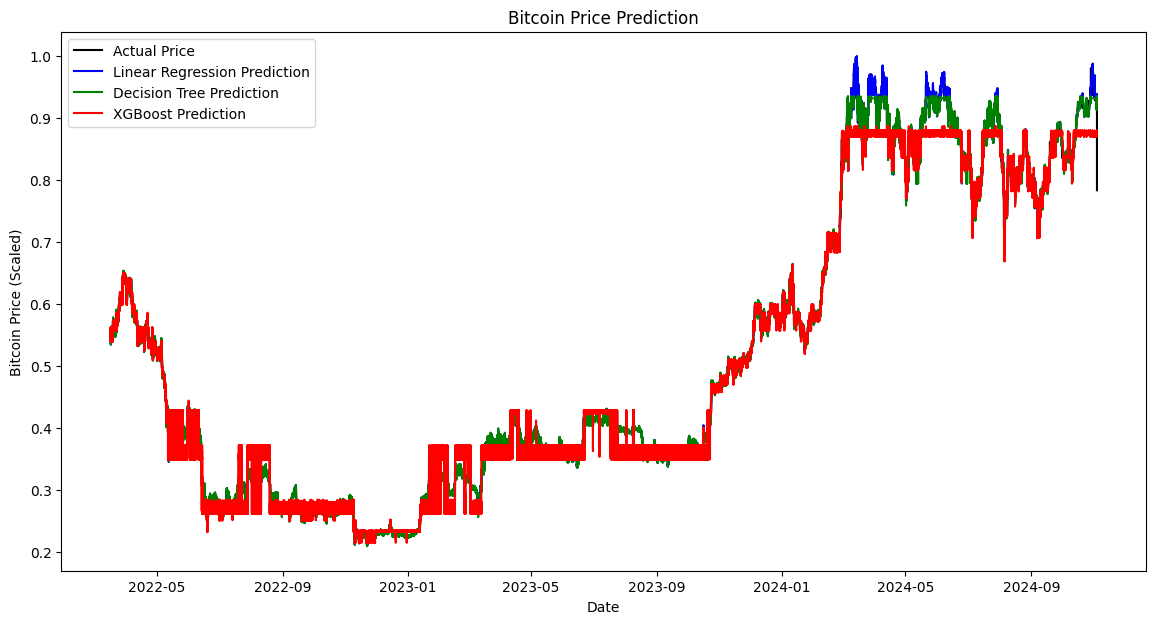

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('/content/drive/MyDrive/btcusd_1-min_data.csv')  # Replace with your actual file name

# Convert Timestamp to datetime and set as index
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')  # Convert Unix timestamp (in seconds) to datetime
data.set_index('Timestamp', inplace=True)

# Handle missing values by forward filling
data.fillna(method='ffill', inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])
data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaled_data

# Define Features and Target
data['Target'] = data['Close'].shift(-1)  # Predict next day's close price
data.dropna(inplace=True)

X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr:.4f}')

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree MSE: {mse_dt:.4f}')

# XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost MSE: {mse_xgb:.4f}')

# Plot Predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='black')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression Prediction', color='blue')
plt.plot(y_test.index, y_pred_dt, label='Decision Tree Prediction', color='green')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Prediction', color='red')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (Scaled)')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()
